# Forecast with ARIMA and ETS 

> Automatic Forecasting with `AutoARIMA` and `AutoETS`

:::{.callout-tip}
You can use Colab to run this Notebook interactively <a href="https://colab.research.google.com/github/Nixtla/statsforecast/blob/main/nbs/examples/Getting_Started_with_Auto_Arima_and_ETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
:::

## Introduction
Automatic forecasting tools search for the best parameters and select the best possible model for a series of time series. These tools are useful for large collections of univariate time series. 

The R's programming language offers two great packages by Rob Hyndmann for Automatic forecasting:

* `AutoARIMA` and 
* `ETS` 

Both models are highly accurate and reliable.  Time series practitioners use them as reference or baseline models in a variety of forecasting tasks. 

Before StatsForecast, similar alternatives -in terms of accuracy and computational efficiency-  did not exist for the Python ecosystem. Seeking to bridge that Gap, we developed a new and highly efficient pure-Python implementation of these classic algorithms. In this notebook, we will show you how to use them. 



## Install the StatsForecast Library

In [ ]:
%%capture
!pip install statsforecast

## Load the Data
For this notebook, we will use the classical [AirPassenger Data set](https://www.kaggle.com/datasets/rakannimer/air-passengers). For simplicity's sake, you can import it from StatsForecast.

In [ ]:
from statsforecast.utils import AirPassengersDF

Y_df = AirPassengersDF

Y_df.head()

/Users/max.mergenthaler/Nixtla/statsforecast/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


Split the dataset in train and test to evaluate your model at a later stage.

In [ ]:
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 monthly observations for train
Y_test_df = Y_df[Y_df.ds>'1959-12-31'] # 12 monthly observations for test

:::{.callout-tip} 
Cross Validation or Backtesting is the recommended method to evaluate  performance of time series models. Cross-validation consists in evaluating the performance of a certain model across different past windows. You can use the `StatsForecast.cross_validation` method from the `StatsForecast` class. See also: [Cross Validation for Time Series](./CrossValidation.ipynb).
:::


In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS
from statsforecast.utils import AirPassengersDF

## Forecast with different models

StatsForecast includes a wide range of models. For this example we will use two classical univarate models: 

**ETS:** The exponential smoothing (ETS) algorithm is especially suited for data with seasonality and trend. ETS computes a weighted average over all observations in the input time series dataset as its prediction. In contrast to moving average methods with constant weights, ETS weights exponentially decrease over time, capturing long term dependencies while prioritizing new observations.

**AutoARIMA:** The autoregressive integrated moving average (ARIMA), combines differencing steps, lag regression and moving averages into a single method capable of modeling non-stationary time series. This method complements on ETS and it is based on the description of data's autocorrelations.

It is always a good idea to include benchmark models to have an estimate of how much accuracy we are gaining. For this exercise, we will use a Naive model.

In [ ]:
from statsforecast import StatsForecast #Imports the core StatsForecast class
from statsforecast.models import AutoARIMA, ETS, Naive #Imports the models you will use


Define the parameters that you want to use in your models. 

In [ ]:
season_length = 12 # Monthly data 
horizon = len(Y_test_df) # Predict the lenght of the test df

# Include the models you imported
models = [
    AutoARIMA(season_length=season_length),
    ETS(season_length=season_length),
    Naive()
]

# Instansiate the StatsForecast class as sf
sf = StatsForecast(
    df=Y_train_df,
    models=models,
    freq='M', 
    n_jobs=-1
)

# Forecast for the defined horizon
Y_hat_df = sf.forecast(horizon)

Y_hat_df.head()

,ds,AutoARIMA,ETS,Naive
unique_id,,,,
1.0,1960-01-31,424.160156,406.651276,405.0
1.0,1960-02-29,407.081696,401.732910,405.0
1.0,1960-03-31,470.860535,456.289642,405.0
1.0,1960-04-30,460.913605,440.870514,405.0
1.0,1960-05-31,484.900879,440.333923,405.0


For efficiency's sake, the forecast method converts the `unique_id` column to an index. You can revert to the default index of the data frame using the [pd.reset_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) method from Pandas.

In [ ]:
Y_hat_df.reset_index()

,unique_id,ds,AutoARIMA,ETS,Naive
0,1.0,1960-01-31,424.160156,406.651276,405.0
1,1.0,1960-02-29,407.081696,401.732910,405.0
2,1.0,1960-03-31,470.860535,456.289642,405.0
3,1.0,1960-04-30,460.913605,440.870514,405.0
4,1.0,1960-05-31,484.900879,440.333923,405.0
5,1.0,1960-06-30,536.903931,496.866058,405.0
6,1.0,1960-07-31,612.903198,545.839111,405.0
7,1.0,1960-08-31,623.903381,544.672485,405.0
8,1.0,1960-09-30,527.903320,477.034485,405.0
9,1.0,1960-10-31,471.903320,412.423096,405.0


## Plot the predictions

Plot the forecasts (also known as Y hat) against the real values of test using Matplot lib.

In [ ]:
import matplotlib.pyplot as plt


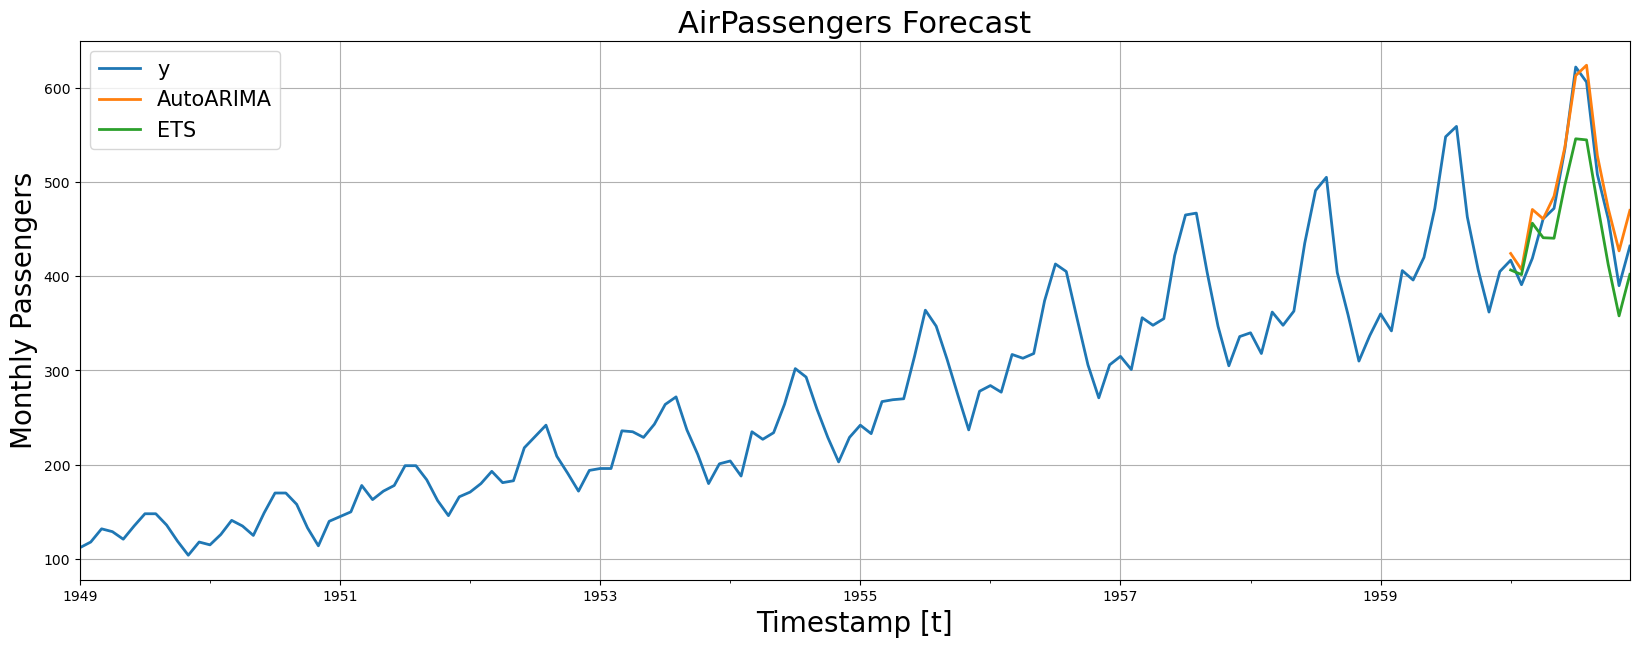

In [ ]:
# Merge the forecasts with the true values
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])


fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## Evaluate the predictions

Finally, we evaluate the predictions accuracy using the Mean Absolute Error:

$$
\qquad MAE = \frac{1}{Horizon} \sum_{\tau} |y_{\tau} - \hat{y}_{\tau}|\qquad
$$

In [ ]:
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

y_true = Y_test_df['y'].values
ets_preds = Y_hat_df['ETS'].values
arima_preds = Y_hat_df['AutoARIMA'].values
naive_preds = Y_hat_df['Naive'].values

print('ETS   MAE: %0.3f' % mae(ets_preds, y_true))
print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))
print('Naive MAE: %0.3f' % mae(naive_preds, y_true))

ETS   MAE: 35.612
ARIMA MAE: 18.551
Naive MAE: 76.000


The best-performing model for this dataset is the ARIMA model. Notice that in both cases, our models are fare better estimates of the future than our baseline model. 

:::{.callout-tip}
For a complete list of available automatic forecasting models -as well as benchmark models- visit the model's section of the documentation.
:::

## References

[Hyndman, RJ and Khandakar, Y (2008) "Automatic time series forecasting: The forecast package for R", Journal of Statistical Software, 26(3).](https://www.jstatsoft.org/article/view/v027i03)